#             Optimization of Indian Cricket Team Selection using Mixed Integer Programming
                                IE555 Programming For Analytics
Project Members:
    1) Anjarlekar Sujay Dayanand (#50289708)
    2) Rajgure Gaurav Sureshrao  (#50289175)

In [77]:
# Importing Required Libraries
import requests
import numpy as np
import pandas as pd
import pulp
import matplotlib.pyplot as plt


In [80]:
# Players who are in their good form in past 5 years 
# Below player list contains player ID's on the Cricapi.com 
player=[253802,28081,34102,625371,931581,422108,625383,28235,290716,234675,277916,30045,32540,236779,481896,326016,559235,430246,33141,376116]
y = {} # Creating empty dictionary y in which all players data will be stored
# Using for loop for getting data 
for i in range(len(player)):
    # Requesting the api for the player stats
    x=requests.get('http://cricapi.com/api/playerStats?apikey=hO2PIPx0JWcnPUaBCqjEwLrodZw1&pid='+str(player[i])).json()
    z={} # Empty dictionary for data of player respectively
    # Adding the required data from the data given by api to the dictionary z
    z['Name']=x['fullName']
    z['ID'] = x['pid']
    z['data']=x['data']
    # Deleting values which are unnecessary
    del z['data']['bowling']['listA']
    del z['data']['bowling']['firstClass']
    del z['data']['batting']['listA']
    del z['data']['batting']['firstClass']
    l=i+1
    # Adding z dictionaryof each player in main dictionary y with key of the index in which we are getting data
    y[l]=z
# Checking we are getting data for any random player i=1
y[1]        

{'Name': 'Virat Kohli',
 'ID': 253802,
 'data': {'bowling': {'T20Is': {'10': '0',
    '5w': '0',
    '4w': '0',
    'SR': '36.5',
    'Econ': '8.13',
    'Ave': '49.50',
    'BBM': '1/13',
    'BBI': '1/13',
    'Wkts': '4',
    'Runs': '198',
    'Balls': '146',
    'Inns': '12',
    'Mat': '52'},
   'ODIs': {'10': '0',
    '5w': '0',
    '4w': '0',
    'SR': '160.2',
    'Econ': '6.22',
    'Ave': '166.25',
    'BBM': '1/15',
    'BBI': '1/15',
    'Wkts': '4',
    'Runs': '665',
    'Balls': '641',
    'Inns': '48',
    'Mat': '201'},
   'tests': {'10': '0',
    '5w': '0',
    '4w': '0',
    'SR': '-',
    'Econ': '2.80',
    'Ave': '-',
    'BBM': '-',
    'BBI': '-',
    'Wkts': '0',
    'Runs': '70',
    'Balls': '150',
    'Inns': '7',
    'Mat': '60'}},
  'batting': {'T20Is': {'50': '17',
    '100': '0',
    'St': '0',
    'Ct': '27',
    '6s': '35',
    '4s': '199',
    'SR': '136.17',
    'BF': '1360',
    'Ave': '52.91',
    'HS': '90*',
    'Runs': '1852',
    'NO': '13',
 

### Data Cleaning

In [81]:

t=y.copy() # copying the y dictionary as another dictionary t which we will use in next steps
ODIs=[1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] # Players who plays in ODIs
tests=[1,3,4,6,8,10,11,12,13,14,15,16,17,20] # Players who plays in Tests 
T20Is=[1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20] # Players who play in T20Is
# In the next step we are replacing the values '-' by 0
# Firstly replacing '-' values of ODIs 
for i in ODIs:
        if t[i]['data']['batting']['ODIs']['SR']=='-':
            t[i]['data']['batting']['ODIs']['SR']=0
        if t[i]['data']['batting']['ODIs']['Ave']=='-':
            t[i]['data']['batting']['ODIs']['Ave']=0
        if t[i]['data']['bowling']['ODIs']['Ave']=='-':
            t[i]['data']['bowling']['ODIs']['Ave']=0
        if t[i]['data']['bowling']['ODIs']['SR']=='-':
            t[i]['data']['bowling']['ODIs']['SR']=0
              
# Similaraly for the tests data       
for i in tests:
        if t[i]['data']['batting']['tests']['SR']=='-':
            t[i]['data']['batting']['tests']['SR']=0
        if t[i]['data']['batting']['tests']['Ave']=='-':
            t[i]['data']['batting']['tests']['Ave']=0
        if t[i]['data']['bowling']['tests']['Ave']=='-':
           t[i]['data']['bowling']['tests']['Ave']=0
        if t[i]['data']['bowling']['tests']['SR']=='-':
           t[i]['data']['bowling']['tests']['SR']=0
# Similarly for the T20Is
for i in T20Is:
        #print(i)
        if t[i]['data']['batting']['T20Is']['SR']=='-':
            t[i]['data']['batting']['T20Is']['SR']=0
        if t[i]['data']['batting']['T20Is']['Ave']=='-':
            t[i]['data']['batting']['T20Is']['Ave']=0
        if t[i]['data']['bowling']['T20Is']['Ave']=='-':
            t[i]['data']['bowling']['T20Is']['Ave']=0
        if t[i]['data']['bowling']['T20Is']['SR']=='-':
            t[i]['data']['bowling']['T20Is']['SR']=0


### Optimization Model for selecting the ODIs Team 

In [82]:

odis=[1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] # players who play odis
A=[4,9,10] # players whop are AllRounders
B=[1,4,2,3,6,8,9,10,11,12,13,19] # players who are batsmen
W=[2,12] #wicketkeepers
O=[7,14,15,16,17,18,20] #Bowlers
S=[9,10,17,18]#spinners
# Using Pulp library to solve optimization model
# Setting Variables
# x[i] is binary variable which will have value equal to '1' if player i get selected in team, otherwise it will have value '0'
x= pulp.LpVariable.dicts( "x", indexs = odis, lowBound=0, upBound=1, cat='Integer', indexStart=[] )
# bat is continuous variable which represents total batting score/points all elevan players are contributing
bat = pulp.LpVariable.dicts( "bat",indexs=odis, lowBound=0,cat='Continuous' )
# bowl is continuous variable which represents total bowling score/points all Bowlers are contributing
bowl = pulp.LpVariable.dicts( "bowl", indexs=odis,lowBound=0,cat='Continuous')
# allr is continuous variable which represents total bowling score/points all AllRounders are contributing
allr = pulp.LpVariable.dicts( "allr", indexs=odis,lowBound=0,cat='Continuous')
# Setting objective function to maximize
model1 = pulp.LpProblem("Best ODIs Team of India ", pulp.LpMaximize)
# Objective Function
model1 += bat[1]-bowl[1]-allr[1]
# Constraints
# Calculating variable bat by taking sum of weighted batting score/point using SR & Ave taking weights as 0.3 & 0.7 respectively of Batters
model1 += bat[1]==sum([(0.30*float(t[i]['data']['batting']['ODIs']['SR'])+
                       0.70*float(t[i]['data']['batting']['ODIs']['Ave']))*x[i]for i in B])
# Calculating variable bowl by taking sum of weighted bowling score/point using SR & Ave taking weights as 0.7 & 0.3 respectively of Bowlers
model1 += bowl[1]==sum([(0.70*(float(t[j]['data']['bowling']['ODIs']['SR']))+
                              (0.30*float(t[j]['data']['bowling']['ODIs']['Ave'])))*x[j]for j in O])
# Calculating variable allr by taking sum of weighted bowling score/point using SR & Ave taking weights as 0.7 & 0.3 respectively of AllRounders
model1 += allr[1]==sum([(0.6*(float(t[j]['data']['bowling']['ODIs']['SR']))+
                              (0.4*float(t[j]['data']['bowling']['ODIs']['Ave'])))*x[j]for j in O])
model1 += sum( [ x[i]for i in odis]  ) ==11 #Players in team must be 11
model1 += sum( [ x[i]for i in A]  ) >=1 # There must be at least 1 AllRounder in team
model1 += sum( [ x[i]for i in W]  ) >=1 # There must be 1 Wicket Keeper in team
model1 += sum( [ x[i]for i in O]  ) >=4 # There must be at least 4 Bolwers in team
model1 += sum( [ x[i]for i in B]  ) >=4 # There must be at least 4 Batters in team
model1 += sum( [ x[i]for i in S]  ) >=1 # There must be at least 1 spinner in team
model1 += x[1] ==1 # Player 1 (Virat Kohli) is captain so he must be selected
model1 += x[3] ==1 # Player 3 (Rohit Sharma) is vice captain of team so he must be in team
model1 += x[2] ==1 # Player 2 (M S Dhoni) is the who has good experienced of wicket keeping & team strategy and he was former captain so he should be in team
model1.solve() 
pulp.LpStatus[model1.status] # Checking status of solution, it should be 'optimal'
ODITEAM=[] # Creating ODITEAM as list in which will contain selected player IDs
for ident in odis: 
    if x[ident].value()==1.0: 
        ODITEAM.append(ident) 
        print(t[int(ident)]['Name'])
odibat=bat[1].value() 
odibowl=bowl[1].value() 
odiallr=allr[1].value() 
odiscore=pulp.value(model1.objective) 
ODITEAM
print('odiscore:%d'%odiscore)

Virat Kohli
Mahendra Singh Dhoni
Rohit Gurunath Sharma
Hardik Himanshu Pandya
Jasprit Jasbirsingh Bumrah
Shikhar Dhawan
Kedar Mahadav Jadhav
Ishant Sharma
Mohammed Shami Ahmed
Kuldeep Yadav
Ambati Thirupathi Rayudu
odiscore:196


### Finding Weighted Scores for the Current ODI Team of India

In [83]:
# Finding the weightes scores (codiscore,codibat,codibowl,codiallr) for the Current ODI team of India
currentodi=[1,2,3,4,6,8,10,15,16,7,18]  # player IDs of current ODI team of India
CB=[1,2,3,4,6,8,10] # Batters
CO=[7,15,16,18] # Bowlers
CA=[4,10] # AllRounders
cbat=sum([(0.30*float(t[i]['data']['batting']['ODIs']['SR'])+
                       0.70*float(t[i]['data']['batting']['ODIs']['Ave']))for i in CB])
cbowl=sum([(0.7*(float(t[j]['data']['bowling']['ODIs']['SR']))+
                              (0.3*float(t[j]['data']['bowling']['ODIs']['Ave'])))for j in CO])
callr=sum([(0.6*(float(t[j]['data']['bowling']['ODIs']['SR']))+
                              (0.4*float(t[j]['data']['bowling']['ODIs']['Ave'])))for j in CA])
codiscore=cbat-cbowl-callr # Calculating Weighted Score of Current team of India
codibat=cbat 
codibowl=cbowl
codiallr=callr 
print('codiscore:%d'%codiscore)


codiscore:196


### Optimizaion Model for Selecting T20I Team 

In [84]:
t20i=[1,2,3,4,6,7,8,10,11,12,14,15,16,17,18,19,20] # playeras who play T20Is
A=[4,10] # players whop are allrounders
B=[1,4,2,3,6,8,10,11,12,19] # players who are batsmen
W=[2,12] #wicketkeepers
O=[7,14,15,16,17,18,20] #Bowlers
S=[10,17,18]#spinners
# Setting Variables
x= pulp.LpVariable.dicts( "x", indexs =t20i , lowBound=0, upBound=1, cat='Integer', indexStart=[] )
tbat = pulp.LpVariable.dicts( "bat",indexs=t20i, lowBound=0,cat='Continuous' )
tbowl = pulp.LpVariable.dicts( "bowl", indexs=t20i,lowBound=0,cat='Continuous')
tallr = pulp.LpVariable.dicts( "allr", indexs=t20i,lowBound=0,cat='Continuous')

model2 = pulp.LpProblem("Best T20Is Team of India ", pulp.LpMaximize)
# Objective Function
model2 += tbat[1]-tbowl[1]-tallr[1]

model2 += tbat[1]==sum([(0.8*float(t[i]['data']['batting']['T20Is']['SR'])+
                     0.2*float(t[i]['data']['batting']['T20Is']['Ave']))*x[i]for i in B])
 
model2 += tbowl[1]==sum([(0.25*(float(t[j]['data']['bowling']['T20Is']['SR']))+
                              (0.75*float(t[j]['data']['bowling']['T20Is']['Ave'])))*x[j]for j in O])

model2 += tallr[1]==sum([(0.25*(float(t[j]['data']['bowling']['T20Is']['SR']))+
                              (0.75*float(t[j]['data']['bowling']['T20Is']['Ave'])))*x[j]for j in A])
model2 += sum( [ x[i]for i in t20i]  ) ==11 #Players in team must be 11
model2 += sum( [ x[i]for i in A]  ) >=1 # There must be at least 1 AllRounder in team
model2 += sum( [ x[i]for i in W]  ) >=1 # There must be at least 1 WicketKeeper in team
model2 += sum( [ x[i]for i in O]  ) >=4 # There must be at least 4 Bowlers in team
model2 += sum( [ x[i]for i in B]  ) >=4 # There must be at least 4 Batters in team
model2 += sum( [ x[i]for i in S]  ) >=1 # There must be at least 1 Spinner in team
model2 += x[1] ==1 # Player 1 (Virat Kohli) is captain so he must be selected
model2 += x[3] ==1 # Player 3 (Rohit Sharma) is vice captain of team so he must be in team
model2 += x[2] ==1 # Player 2 (M S Dhoni) should be in team
model2.solve() 
pulp.LpStatus[model2.status] 
T20ITEAM=[] # Creating T20ITEAM as list in which will contain selected player IDs
for ident in t20i:
    if x[ident].value()==1.0: 
        print(ident)
        T20ITEAM.append(ident)
        print(t[int(ident)]['Name'])
t20ibat=tbat[1].value() 
t20ibowl=tbowl[1].value() 
t20iallr=tallr[1].value() 
t20iscore=pulp.value(model2.objective)
t20iscore


1
Virat Kohli
2
Mahendra Singh Dhoni
3
Rohit Gurunath Sharma
4
Hardik Himanshu Pandya
6
Kannaur Lokesh Rahul
7
Jasprit Jasbirsingh Bumrah
8
Shikhar Dhawan
12
Krishnakumar Dinesh Karthik
17
Kuldeep Yadav
18
Yuzvendra Singh Chahal
20
Umeshkumar Tilak Yadav


664.8485000000001

### Finding Weighted Scores for the current T20I  team of India

In [85]:
# Finding the weightes scores (ct20iscore,ct20ibat,ct20ibowl,ct20iallr) for the Current T20I team of India
currentt20i=[1,2,3,4,12,8,10,18,16,7,17] # player IDs of current T20I team of India
CB=[1,2,3,4,8,10,12] # Batters
CO=[7,17,16,18] # Bowlers
CA=[4,10] # Allrounders
cbat=sum([(0.80*float(t[i]['data']['batting']['T20Is']['SR'])+
                       0.20*float(t[i]['data']['batting']['T20Is']['Ave']))for i in CB])
cbowl=sum([(0.25*(float(t[j]['data']['bowling']['T20Is']['SR']))+
                              (0.75*float(t[j]['data']['bowling']['T20Is']['Ave'])))for j in CO])
# Calculating variable callr by taking sum of weighted bowling score/point using SR & Ave taking weights as 0.25 & 0.75 respectively of AllRounders
callr=sum([(0.25*(float(t[j]['data']['bowling']['T20Is']['SR']))+
                              (0.75*float(t[j]['data']['bowling']['T20Is']['Ave'])))for j in CA])
ct20iscore=cbat-cbowl-callr # Calculating Weighted Score of Current team of India
ct20ibat=cbat
ct20ibowl=cbowl
ct20iallr=callr
print(ct20iscore)

579.84


### Optimization Model for selecting TESTS Team for the India

In [86]:
test=[1,3,4,6,8,10,11,12,13,14,15,16,17,20] # playeras who play Tests
A=[4,10] # players whop are allrounders
B=[1,4,3,6,8,10,11,12,13] # players who are batsmen
W=[6,12] #wicketkeepers
O=[14,15,16,17,20] #Bowlers
S=[10,17]#spinners
x= pulp.LpVariable.dicts( "x", indexs =test , lowBound=0, upBound=1, cat='Integer', indexStart=[] )
tebat = pulp.LpVariable.dicts( "bat",indexs=test, lowBound=0,cat='Continuous' )
tebowl = pulp.LpVariable.dicts( "bowl", indexs=test,lowBound=0,cat='Continuous')
teallr = pulp.LpVariable.dicts( "allr", indexs=test,lowBound=0,cat='Continuous')
model3 = pulp.LpProblem("Best TESTS Team of India ", pulp.LpMaximize)
# Objective Function
model3 += tebat[1]-tebowl[1]-teallr[1]
# Constraints
model3 += tebat[1]==sum([(0.20*float(t[i]['data']['batting']['tests']['SR'])+
                     (0.80*float(t[i]['data']['batting']['tests']['Ave'])))*x[i]for i in B])

model3 += tebowl[1]==sum([(0.60*(float(t[j]['data']['bowling']['tests']['SR']))+
                              (0.40*float(t[j]['data']['bowling']['tests']['Ave'])))*x[j]for j in O])

model3 += teallr[1]==sum([(0.6*(float(t[j]['data']['bowling']['tests']['SR']))+
                              (0.40*float(t[j]['data']['bowling']['tests']['Ave'])))*x[j]for j in A])
model3 += sum( [ x[i]for i in test]  ) ==11 #Players in team must be 11
model3 += sum( [ x[i]for i in A]  ) >=1 # There must be at least 1 AllRounder in team
model3 += sum( [ x[i]for i in W]  ) >=1 # There must be at least 1 Wicketkeeper in team
model3 += sum( [ x[i]for i in O]  ) >=4 # There must be at least 4 Bolwers in team
model3 += sum( [ x[i]for i in B]  ) >=4 # There must be at least 4 Batters in team
model3 += sum( [ x[i]for i in S]  ) >=1 # There must be at least 1 Spinner in team
model3 += x[1] ==1 # Player 1 (Virat Kohli) is captain so he must be selected

model3.solve() 
pulp.LpStatus[model3.status] # Checking status of solution, it should be 'optimal'
TESTTEAM=[] # Creating TESTTEAM as list in which will contain selected player IDs
for ident in tests:
    if x[ident].value()==1.0:
        print(ident)
        TESTTEAM.append(ident)
        print(t[int(ident)]['Name'])
testbat=tebat[1].value() 
testbowl=tebowl[1].value() 
testallr=teallr[1].value() 
testscore=pulp.value(model3.objective)
testscore
TESTTEAM

1
Virat Kohli
3
Rohit Gurunath Sharma
4
Hardik Himanshu Pandya
6
Kannaur Lokesh Rahul
8
Shikhar Dhawan
11
Ajinkya Madhukar Rahane
13
Cheteshwar Arvind Pujara
15
Mohammed Shami Ahmed
16
Bhuvneshwar Kumar Singh
17
Kuldeep Yadav
20
Umeshkumar Tilak Yadav


[1, 3, 4, 6, 8, 11, 13, 15, 16, 17, 20]

### Finding Weights scores for the current TEST team of India

In [87]:
# Finding the weightes scores (cotestscore,ctestbat,ctestbowl,ctestallr) for the Current TEST team of India
currenttest=[1,6,13,11,14,15,20,4,8,16,12] 
CB=[1,4,8,11,13,12,6] 
CO=[14,15,16,20]
CA=[4]
 
cbat=sum([(0.2*float(t[i]['data']['batting']['tests']['SR'])+
                       0.8*float(t[i]['data']['batting']['tests']['Ave']))for i in CB])
 
cbowl=sum([(0.6*(float(t[j]['data']['bowling']['tests']['SR']))+
                              (0.4*float(t[j]['data']['bowling']['tests']['Ave'])))for j in CO])

callr=sum([(0.6*(float(t[j]['data']['bowling']['ODIs']['SR']))+
                              (0.4*float(t[j]['data']['bowling']['tests']['Ave'])))for j in CA])
ctestscore=cbat-cbowl-callr # Calculating Weighted Score of Current team of India
ctestbat=cbat
ctestbowl=cbowl
ctestallr=callr
print('ctestscore%d'%ctestscore)

ctestscore118


## Analysis Part

### Group BarChart of Weighted Batting & Bowling Score of Model Output Team & Current Team of all formats

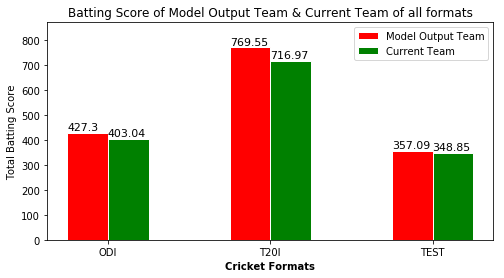

<Figure size 432x288 with 0 Axes>

In [88]:
# Group BarChart of Batting Score of Model Output Team & Current Team of all formats
fig, ax = plt.subplots(figsize=(8,4))
barWidth = 0.25
batstat= [odibat,t20ibat,testbat]
cbatstat= [codibat,ct20ibat,ctestbat]
r1 = np.arange(len(batstat))
r2 = [x + barWidth for x in r1]
plt.bar(r1, batstat, color='red', width=barWidth, edgecolor='white', label='Model Output Team')
plt.bar(r2, cbatstat, color='green', width=barWidth, edgecolor='white', label='Current Team')
plt.xlabel('Cricket Formats', fontweight='bold')
plt.xticks([ r+0.5*barWidth for r in range(len(batstat))], ['ODI', 'T20I', 'TEST'])
ax.set_ylabel('Total Batting Score')
ax.set_title('Batting Score of Model Output Team & Current Team of all formats')
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+10, \
            str(round((i.get_height()), 2)), fontsize=11, color='black')
plt.ylim([0,max([odibat,t20ibat,testbat,codibat,ct20ibat,ctestbat])+100])
plt.legend()
plt.savefig('5.PNG')
plt.show()
plt.savefig('samplefigure.png')
# From this group bar chart we can compare the weighted scores of batting of Model Output Team & Current teams of all formats

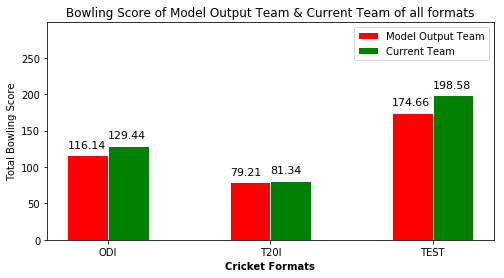

In [89]:
# Group BarChart of Bowling Score of Model Output Team & Current Team of all formats
fig, ax = plt.subplots(figsize=(8,4))
barWidth = 0.25
bowlstat= [odibowl,t20ibowl,testbowl]
cbowlstat= [codibowl,ct20ibowl,ctestbowl]
r1 = np.arange(len(bowlstat))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bowlstat, color='red', width=barWidth, edgecolor='white', label='Model Output Team')
plt.bar(r2, cbowlstat, color='green', width=barWidth, edgecolor='white', label='Current Team')
plt.xlabel('Cricket Formats', fontweight='bold')
plt.xticks([ r+0.5*barWidth for r in range(len(bowlstat))], ['ODI', 'T20I', 'TEST'])
ax.set_ylabel('Total Bowling Score')
ax.set_title('Bowling Score of Model Output Team & Current Team of all formats')
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+10, \
            str(round((i.get_height()), 2)), fontsize=11, color='black')
plt.ylim([0,max([odibowl,t20ibowl,testbowl,codibowl,ct20ibowl,ctestbowl])+100])
plt.legend()
plt.savefig('6.PNG')
plt.show()
# From this group bar chart we can compare the weighted scores of Bowling of Model Output Team & Current teams of all formats

### Comparison of contribution of the players in weighted Batting & Bowling scores in all Formats using Pie Chart

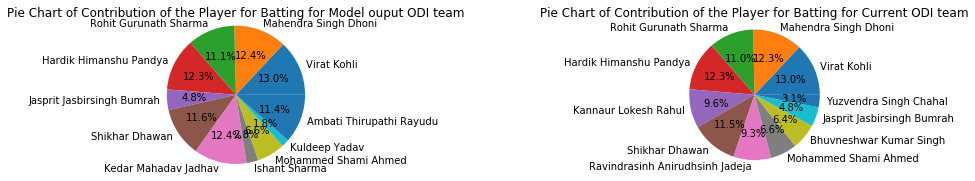

In [90]:
# Comparison of Contribution of the Player for Batting for Model ouput ODI team & Current ODI team
B=[1,2,3,5,6,8,11,12,13,19] 
O=[7,14,15,16,17,18,20,] 
A=[4,9,10] 
NamesM=[] 
BODIPPTS=[]
# Finding weighted batting score of players in Model Ouput Team
for i in ODITEAM:
    batp = (0.30*float(t[i]['data']['batting']['ODIs']['SR']) 
                + 0.70*float(t[i]['data']['batting']['ODIs']['Ave']))
    BODIPPTS.append(batp)
    NamesM.append(t[i]['Name'])
BODIPPTS
# Finding weighted batting score of players in Current Team
NamesC=[]
CBODIPPTS=[]
for i in currentodi:
    batp = (0.30*float(t[i]['data']['batting']['ODIs']['SR']) 
                + 0.70*float(t[i]['data']['batting']['ODIs']['Ave']))
    CBODIPPTS.append(batp)
    NamesC.append(t[i]['Name'])
CBODIPPTS
fig = plt.figure()
ax1 = fig.add_axes([0, 1, 0.5, .5], aspect=1)
ppt=ax1.pie(BODIPPTS,labels=NamesM , radius = 1.2,autopct='%1.1f%%')
ax2 = fig.add_axes([1.2,1, .5, 0.5], aspect=1)
ppt2=ax2.pie(CBODIPPTS, labels=NamesC, radius = 1.2,autopct='%1.1f%%')
ax1.set_title('Pie Chart of Contribution of the Player for Batting for Model ouput ODI team')
ax2.set_title('Pie Chart of Contribution of the Player for Batting for Current ODI team')
plt.axis('equal')
plt.savefig('7.PNG')
plt.show()
# From these two pie charts we can find the importatnce of he player for batting in both teams

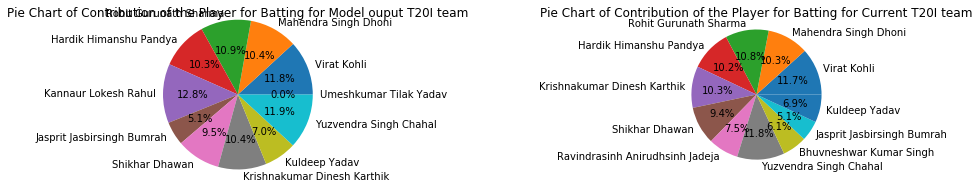

In [91]:
# Comparison of Contribution of the Player for Batting for Model ouput T20I team & CurrentT20I team
B=[1,2,3,5,6,8,11,12,13,19]
O=[7,14,15,16,17,18,20,]
A=[4,9,10]
NamesM=[]
BT20PPTS=[]
# Finding weighted batting score of players in Model Ouput Team
for i in T20ITEAM:
    batp = (0.8*float(t[i]['data']['batting']['T20Is']['SR']) 
                + 0.20*float(t[i]['data']['batting']['T20Is']['Ave']))
    BT20PPTS.append(batp)
    NamesM.append(t[i]['Name'])
BT20PPTS
# Finding weighted batting score of players in Current Team
NamesC=[]
CT20PPTS=[]
for i in currentt20i:
    batp = (0.8*float(t[i]['data']['batting']['T20Is']['SR']) 
                + 0.2*float(t[i]['data']['batting']['T20Is']['Ave']))
    CT20PPTS.append(batp)
    NamesC.append(t[i]['Name'])
CBODIPPTS
fig = plt.figure()
ax1 = fig.add_axes([0, 0.5, 0.5, .5], aspect=1)
ppt=ax1.pie(BT20PPTS,labels=NamesM , radius = 1.3,autopct='%1.1f%%')
ax2 = fig.add_axes([1.2,0.5, .5, 0.5], aspect=1)
ppt2=ax2.pie(CT20PPTS, labels=NamesC, radius = 1.3,autopct='%1.1f%%')
ax1.set_title('Pie Chart of Contribution of the Player for Batting for Model ouput T20I team')
ax2.set_title('Pie Chart of Contribution of the Player for Batting for Current T20I team')
plt.axis('equal')
plt.savefig('8.PNG')
plt.show()
# From these two pie charts we can find the importatnce of he player for batting in both teams

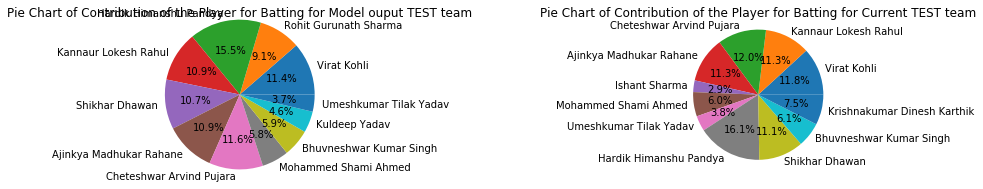

In [92]:
# Comparison of Contribution of the Player for Batting for Model ouput TEST team & Current TEST team
B=[1,2,3,5,6,8,11,12,13,19]
O=[7,14,15,16,17,18,20,]
A=[4,9,10]
NamesM=[]
BTESTPPTS=[]
# Finding weighted batting score of players in Model Ouput Team
for i in TESTTEAM:
    batp = (0.2*float(t[i]['data']['batting']['tests']['SR']) 
                + 0.80*float(t[i]['data']['batting']['tests']['Ave']))
    BTESTPPTS.append(batp)
    NamesM.append(t[i]['Name'])
BTESTPPTS
# Finding weighted batting score of players in Current Team
NamesC=[]
CTESTPPTS=[]
for i in currenttest:
    batp = (0.2*float(t[i]['data']['batting']['tests']['SR']) 
                + 0.8*float(t[i]['data']['batting']['tests']['Ave']))
    CTESTPPTS.append(batp)
    NamesC.append(t[i]['Name'])
CTESTPPTS
fig = plt.figure()
ax1 = fig.add_axes([0, 0.5, 0.5, .5], aspect=1)
ppt=ax1.pie(BTESTPPTS,labels=NamesM , radius = 1.3,autopct='%1.1f%%')
ax2 = fig.add_axes([1.2,0.5, .5, 0.5], aspect=1)
ppt2=ax2.pie(CTESTPPTS, labels=NamesC, radius = 1.3,autopct='%1.1f%%')
ax1.set_title('Pie Chart of Contribution of the Player for Batting for Model ouput TEST team')
ax2.set_title('Pie Chart of Contribution of the Player for Batting for Current TEST team')
plt.axis('equal')
plt.savefig('9.PNG')
plt.show()
# From these two pie charts we can find the importatnce of he player for batting in both teams

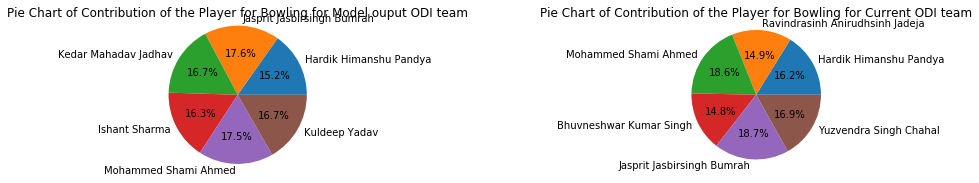

In [93]:
# Comparison of Contribution of the Player for Bowling for Model ouput ODI team & Current ODI team
B=[1,2,3,5,6,8,11,12,13,19]
O=[7,14,15,16,17,18,20,]
A=[4,9,10]
NamesM=[]
BWODIPPTS=[]
# Finding weighted bowling score of players in Model Ouput Team
for i in ODITEAM:
    if i in O:
        bowlp =100-(0.70*(float(t[i]['data']['bowling']['ODIs']['SR']))+
                              (0.30*float(t[i]['data']['bowling']['ODIs']['Ave'])))
        BWODIPPTS.append(bowlp)
        NamesM.append(t[i]['Name'])
    elif i in A:
        bowlp =100-(0.70*(float(t[i]['data']['bowling']['ODIs']['SR']))+
                              (0.30*float(t[i]['data']['bowling']['ODIs']['Ave'])))
        BWODIPPTS.append(bowlp)
        NamesM.append(t[i]['Name'])
BWODIPPTS
# Finding weighted bowling score of players in Current Team
NamesC=[]
CBWODIPPTS=[]
for i in currentodi:
     if i in O:
        bowlp =100-(0.70*(float(t[i]['data']['bowling']['ODIs']['SR']))+
                              (0.30*float(t[i]['data']['bowling']['ODIs']['Ave'])))
        CBWODIPPTS.append(bowlp)
        NamesC.append(t[i]['Name'])
     elif i in A:
        bowlp =100-(0.70*(float(t[i]['data']['bowling']['ODIs']['SR']))+
                              (0.30*float(t[i]['data']['bowling']['ODIs']['Ave'])))
        CBWODIPPTS.append(bowlp)
        NamesC.append(t[i]['Name'])
CBWODIPPTS
fig = plt.figure()
ax1 = fig.add_axes([0, 1, 0.5, .5], aspect=1)
ppt=ax1.pie(BWODIPPTS,labels=NamesM , radius = 1.2,autopct='%1.1f%%')
ax2 = fig.add_axes([1.2,1, .5, 0.5], aspect=1)
ppt2=ax2.pie(CBWODIPPTS, labels=NamesC, radius = 1.2,autopct='%1.1f%%')
ax1.set_title('Pie Chart of Contribution of the Player for Bowling for Model ouput ODI team')
ax2.set_title('Pie Chart of Contribution of the Player for Bowling for Current ODI team')
plt.axis('equal')
plt.savefig('10.PNG')
plt.show()
# From these two pie charts we can find the importatnce of he player for bowling in both teams

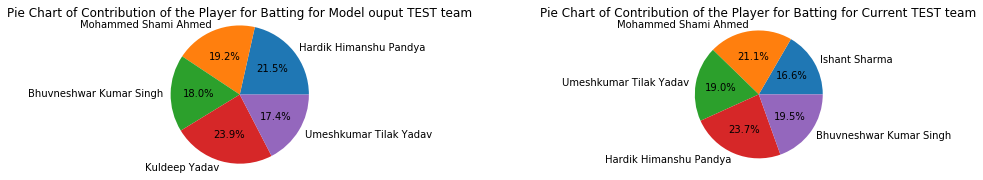

In [94]:
# Comparison of Contribution of the Player for Bowling for Model ouput T20I team & Current T20I team
B=[1,2,3,5,6,8,11,12,13,19]
O=[7,14,15,16,17,18,20]
A=[4,9,10]
NamesM=[]
BWTESTPPTS=[]
# Finding weighted bowling score of players in Model Ouput Team
for i in TESTTEAM:
    if i in O:
        bowlp =100-(0.60*(float(t[i]['data']['bowling']['tests']['SR']))+
                              (0.40*float(t[i]['data']['bowling']['tests']['Ave'])))
        BWTESTPPTS.append(bowlp)
        NamesM.append(t[i]['Name'])
    elif i in A:
        bowlp =100-(0.60*(float(t[i]['data']['bowling']['tests']['SR']))+
                              (0.40*float(t[i]['data']['bowling']['tests']['Ave'])))
        BWTESTPPTS.append(bowlp)
        NamesM.append(t[i]['Name'])
BWTESTPPTS
# Finding weighted bowling score of players in Current Team
NamesC=[]
CBWTESTPPTS=[]
for i in currenttest:
     if i in O:
        bowlp =100-(0.70*(float(t[i]['data']['bowling']['tests']['SR']))+
                              (0.30*float(t[i]['data']['bowling']['tests']['Ave'])))
        CBWTESTPPTS.append(bowlp)
        NamesC.append(t[i]['Name'])
     elif i in A:
        bowlp =100-(0.70*(float(t[i]['data']['bowling']['tests']['SR']))+
                              (0.30*float(t[i]['data']['bowling']['tests']['Ave'])))
        CBWTESTPPTS.append(bowlp)
        NamesC.append(t[i]['Name'])
CBWTESTPPTS
fig = plt.figure()
ax1 = fig.add_axes([0, 1, 0.5, .5], aspect=1)
ppt=ax1.pie(BWTESTPPTS,labels=NamesM , radius = 1.2,autopct='%1.1f%%')
ax2 = fig.add_axes([1.2,1, .5, 0.5], aspect=1)
ppt2=ax2.pie(CBWTESTPPTS, labels=NamesC, radius = 1.2,autopct='%1.1f%%')
ax1.set_title('Pie Chart of Contribution of the Player for Batting for Model ouput TEST team')
ax2.set_title('Pie Chart of Contribution of the Player for Batting for Current TEST team')
plt.axis('equal')
plt.savefig('11.PNG')
plt.show()
# From these two pie charts we can find the importatnce of he player for bowling in both teams

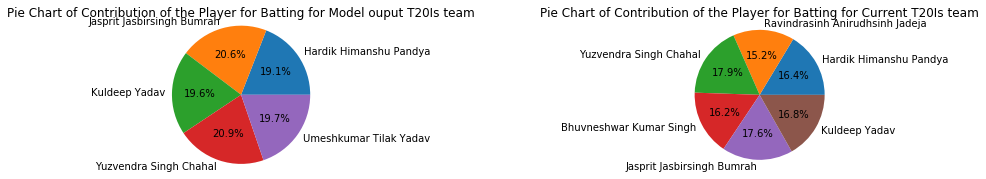

In [95]:
# Comparison of Contribution of the Player for Bowling for Model ouput TEST team & Current TEST team
B=[1,2,3,5,6,8,11,12,13,19]
O=[7,14,15,16,17,18,20]
A=[4,9,10]
NamesM=[]
BWT20PPTS=[]
# Finding weighted bowling score of players in Model Ouput Team
for i in T20ITEAM:
    if i in O:
        bowlp =100-(0.60*(float(t[i]['data']['bowling']['T20Is']['SR']))+
                              (0.40*float(t[i]['data']['bowling']['T20Is']['Ave'])))
        BWT20PPTS.append(bowlp)
        NamesM.append(t[i]['Name'])
    elif i in A:
        bowlp =100-(0.60*(float(t[i]['data']['bowling']['T20Is']['SR']))+
                              (0.40*float(t[i]['data']['bowling']['T20Is']['Ave'])))
        BWT20PPTS.append(bowlp)
        NamesM.append(t[i]['Name'])
BWT20PPTS
# Finding weighted bowling score of players in Current Team
NamesC=[]
CBWT20PPTS=[]
for i in currentt20i:
     if i in O:
        bowlp =100-(0.70*(float(t[i]['data']['bowling']['T20Is']['SR']))+
                              (0.30*float(t[i]['data']['bowling']['T20Is']['Ave'])))
        CBWT20PPTS.append(bowlp)
        NamesC.append(t[i]['Name'])
     elif i in A:
        bowlp =100-(0.70*(float(t[i]['data']['bowling']['T20Is']['SR']))+
                              (0.30*float(t[i]['data']['bowling']['T20Is']['Ave'])))
        CBWT20PPTS.append(bowlp)
        NamesC.append(t[i]['Name'])
CBWT20PPTS
fig = plt.figure()
ax1 = fig.add_axes([0, 1, 0.5, .5], aspect=1)
ppt=ax1.pie(BWT20PPTS,labels=NamesM , radius = 1.2,autopct='%1.1f%%')
ax2 = fig.add_axes([1.2,1, .5, 0.5], aspect=1)
ppt2=ax2.pie(CBWT20PPTS, labels=NamesC, radius = 1.2,autopct='%1.1f%%')
ax1.set_title('Pie Chart of Contribution of the Player for Batting for Model ouput T20Is team')
ax2.set_title('Pie Chart of Contribution of the Player for Batting for Current T20Is team')
plt.axis('equal')
plt.savefig('12.PNG')
plt.show()
# From these two pie charts we can find the importatnce of he player for bowling in both teams

### Group Line Chart for Comparing the Percentage Errors of different weighted scores of all Formats & for both teams

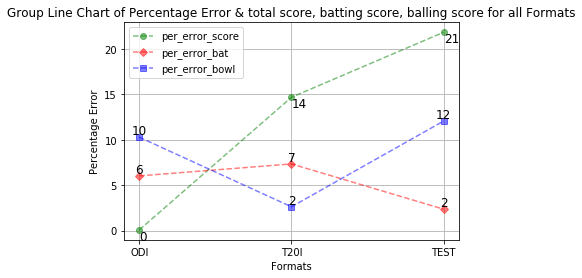

In [96]:
# Calculation of Pecentage errors of different values of each formats for Current teams & Model ouput Team
per_error_odi= abs(100* (codiscore-odiscore)/codiscore) # Percentage Error calculation of ODI weighted score
per_error_t20i= abs(100*(ct20iscore-t20iscore)/ct20iscore) # Percentage Error calculation of T20I weighted score
per_error_test= abs(100*(ctestscore-testscore)/ctestscore) # Percentage Error calculation of TEST weighted score
per_error_odibat= abs(100* (codibat-odibat)/codibat) # Percentage Error calculation of ODI Batting weighted score
per_error_t20ibat= abs(100*(ct20ibat-t20ibat)/ct20ibat) # Percentage Error calculation of T20I Batting weighted score
per_error_testbat= abs(100*(ctestbat-testbat)/ctestbat) # Percentage Error calculation of TEST Batting weighted score
per_error_odibowl= abs(100* (codibowl-odibowl)/codibowl) # Percentage Error calculation of ODI Bowling weighted score
per_error_t20ibowl= abs(100*(ct20ibowl-t20ibowl)/ct20ibowl) # Percentage Error calculation of T20I Bowling weighted score
per_error_testbowl= abs(100*(ctestbowl-testbowl)/ctestbowl) # Percentage Error calculation of TEST Bowling weighted score

formats=['ODI', 'T20I', 'TEST' ] 
per_error_score=[per_error_odi,per_error_t20i,per_error_test] 
per_error_bat=[per_error_odibat,per_error_t20ibat,per_error_testbat] 
per_error_bowl=[per_error_odibowl,per_error_t20ibowl,per_error_testbowl]
plt.plot(formats,per_error_score,'--',color='g',marker='o',alpha=0.5) 
plt.plot(formats,per_error_bat,'--',color='r',marker='D',alpha=0.5) 
plt.plot(formats,per_error_bowl,'--',color='b',marker='s',alpha=0.5) 
plt.xlabel('Formats') 
plt.ylabel('Percentage Error') 
plt.title('Group Line Chart of Percentage Error & total score, batting score, balling score for all Formats') 
plt.legend(['per_error_score','per_error_bat','per_error_bowl']) 

for a,b in zip(formats,per_error_score):
    plt.text(a,b,int(b),horizontalalignment='left',verticalalignment='top',size=12)
for a,b in zip(formats,per_error_bat):
    plt.text(a,b,int(b),horizontalalignment='center',verticalalignment='bottom',size=12)
for a,b in zip(formats,per_error_bowl):
    plt.text(a,b,int(b),horizontalalignment='center',verticalalignment='bottom',size=12)
plt.grid()
plt.savefig('13.PNG')
plt.show()
# From below graph we can compare how accurate optimiztion model is for every format on the basis of 3 different percentage error weighted scores 
# lesser the Percentage error value more accurate model is!